# 0.加载包

In [1]:
# matpltlib 库以及参数
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'axes.labelsize': 'large'})
matplotlib.rcParams.update({'xtick.labelsize': 'large'})
matplotlib.rcParams.update({'ytick.labelsize': 'large'})
matplotlib.rcParams.update({'legend.fontsize': 'large'})
matplotlib.rcParams.update({'errorbar.capsize': 3})

#其他的库
import numpy as np
import pandas as pd
import scipy as sp 

#封装进度条的函数
from tqdm import tqdm    



In [2]:
#读取数据
df=pd.read_csv('./DATA/matched_data_step0.csv')

#按红移从小到大排序
df.sort_values(by=['REDSHIFT'],ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,SDSS_NAME,RA,DEC,REDSHIFT,g_SDSS,gerr_SDSS,r_SDSS,rerr_SDSS,i_SDSS,ierr_SDSS,...,LOGLBOL,ra,dec,g_HSC,gerr_HSC,r_HSC,rerr_HSC,i_HSC,ierr_HSC,hsc_id
0,b'222230.16+010231.4',335.625693,1.042081,0.2235,19.480,0.021,18.707,0.018,18.221,0.013,...,44.991911,335.625695,1.042063,19.239025,0.000670,18.737987,0.000591,18.374371,0.000352,42644584253119735
1,b'134826.86-005943.9',207.111950,-0.995528,0.2340,19.600,0.027,18.677,0.016,18.105,0.019,...,45.117165,207.111954,-0.995535,20.204891,0.001308,19.244598,0.000744,18.704962,0.000426,41192941141645641
2,b'134459.44-001559.5',206.247690,-0.266537,0.2449,17.669,0.020,17.585,0.014,17.438,0.016,...,45.241575,206.247703,-0.266531,18.520733,0.000759,18.283943,0.000497,18.000725,0.000549,41188010519184869
3,b'225757.22-002608.3',344.488429,-0.435656,0.2509,18.951,0.025,18.656,0.018,18.411,0.021,...,44.842626,344.488417,-0.435649,18.982300,0.000546,18.745213,0.000497,18.441834,0.000404,41602247229986243
4,b'135908.00+002731.8',209.783356,0.458855,0.2570,18.858,0.017,18.440,0.016,18.222,0.014,...,45.080632,209.783372,0.458862,18.799702,0.000729,18.566313,0.000581,18.287029,0.000376,42270595680863627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,b'021419.42-010716.9',33.580923,-1.121369,4.6381,24.723,0.684,21.648,0.068,20.373,0.041,...,46.772817,33.580929,-1.121367,23.578850,0.018014,21.177189,0.002088,20.167606,0.003893,40678502843832542
5223,b'222807.58+003526.2',337.031594,0.590630,4.6617,22.987,0.154,20.926,0.042,19.663,0.025,...,47.247363,337.031573,0.590634,22.545631,0.005357,20.601910,0.001311,19.673559,0.000890,42643471856601240
5224,b'222050.80+001959.1',335.211698,0.333103,4.7160,23.962,0.372,21.722,0.075,20.119,0.035,...,47.109201,335.211688,0.333105,24.093718,0.017602,21.735556,0.004149,20.580292,0.001420,42639344393019967
5225,b'000749.16+004119.6',1.954853,0.688786,4.8327,24.895,0.508,21.502,0.064,20.060,0.034,...,47.042949,1.954850,0.688767,25.168055,0.056196,21.931934,0.003383,20.393879,0.001125,41649655079001595


# 1.1. 关于位置的修正  

    虽然经过了距离最小的匹配，但是仍有部分点有ra和dec差距较大，这些点可能不是同一个源，是也可能出问题了，不要了。  

(5227, 22)


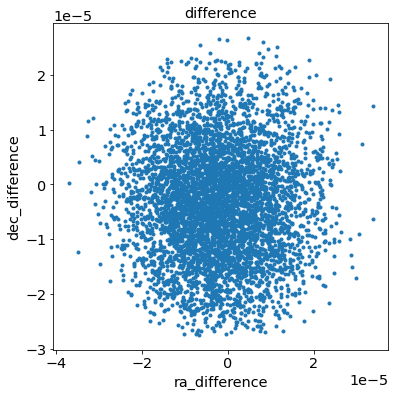

In [9]:
x=df['RA']-df['ra']
y=df['DEC']-df['dec']

#主图参数
matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,6))
plt.title('difference')

#参数
plt.xlabel('ra_difference')
plt.ylabel('dec_difference')
plt.xlim()
plt.ylim()
#图
plt.scatter(x,y,marker='.');
print(df.shape)
plt.savefig('./FIGURES/0_2_1.pdf')
plt.savefig('./FIGURES/0_2_1.png')

In [4]:
#可见大部分的点误差都不会超过0.1角分（约3e-5）
print(df.shape)

(5227, 22)


# 2.关于光度的修正
    有一些SDSS和HSC光度差大的离谱，扔掉

- ## 2.1.gband

In [5]:
def My_Local_Plot_difference(str1,str2):
    #主图参数
    matplotlib.rcParams.update({'font.size': 12})
    plt.figure(figsize=(10,4))
    #
    plt.title('mag_SDSS-HSC res redshift')
    plt.xlabel('redshift')
    plt.ylabel('mag_psf (%s - %s)'% (str1,str2))
    plt.scatter(df['REDSHIFT'],df[str1]-df[str2],marker='.');


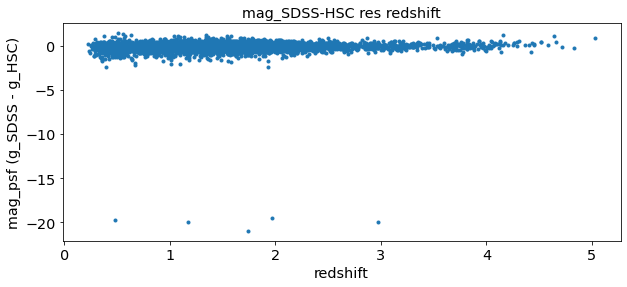

In [6]:
My_Local_Plot_difference('g_SDSS','g_HSC')
plt.savefig('./FIGURES/0_2_2a.pdf')

(5222, 22)


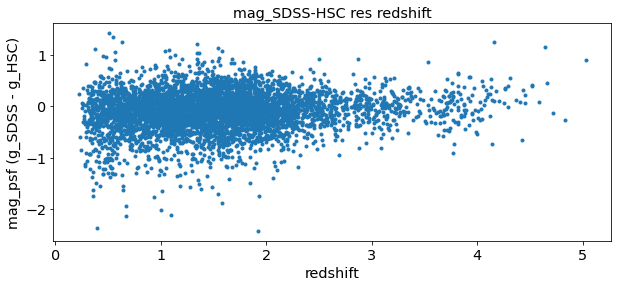

In [7]:
#我们发现有超过20等的差距，这简直不可容忍，扔掉
df=df[abs(df['g_SDSS']-df['g_HSC'])<5]
My_Local_Plot_difference('g_SDSS','g_HSC')
plt.savefig('./FIGURES/0_2_2b.pdf')
print(df.shape)

- ## 2.2.同样应用于rband和iband

(5222, 22)


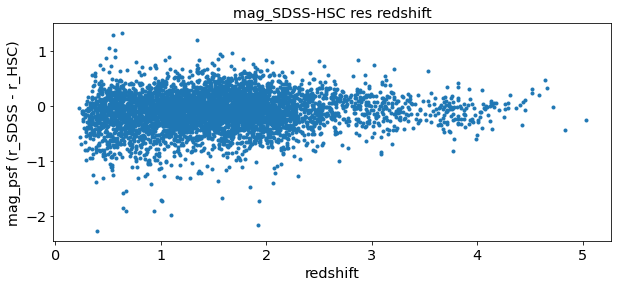

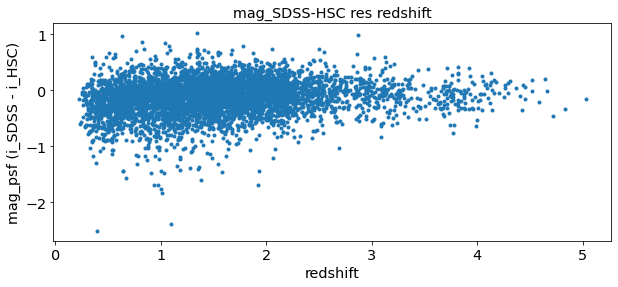

In [8]:
df=df[abs(df['r_SDSS']-df['r_HSC'])<5]
My_Local_Plot_difference('r_SDSS','r_HSC')
df=df[abs(df['i_SDSS']-df['i_HSC'])<5]
My_Local_Plot_difference('i_SDSS','i_HSC')
print(df.shape)

In [9]:
df.reset_index(drop=True,inplace=True)
df.to_csv('./DATA/matched_data_step1.csv',index=0)

In [10]:
df

,SDSS_NAME,RA,DEC,REDSHIFT,g_SDSS,gerr_SDSS,r_SDSS,rerr_SDSS,i_SDSS,ierr_SDSS,...,LOGLBOL,ra,dec,g_HSC,gerr_HSC,r_HSC,rerr_HSC,i_HSC,ierr_HSC,hsc_id
0,b'222230.16+010231.4',335.625693,1.042081,0.2235,19.480,0.021,18.707,0.018,18.221,0.013,...,44.991911,335.625695,1.042063,19.239025,0.000670,18.737987,0.000591,18.374371,0.000352,42644584253119735
1,b'134826.86-005943.9',207.111950,-0.995528,0.2340,19.600,0.027,18.677,0.016,18.105,0.019,...,45.117165,207.111954,-0.995535,20.204891,0.001308,19.244598,0.000744,18.704962,0.000426,41192941141645641
2,b'134459.44-001559.5',206.247690,-0.266537,0.2449,17.669,0.020,17.585,0.014,17.438,0.016,...,45.241575,206.247703,-0.266531,18.520733,0.000759,18.283943,0.000497,18.000725,0.000549,41188010519184869
3,b'225757.22-002608.3',344.488429,-0.435656,0.2509,18.951,0.025,18.656,0.018,18.411,0.021,...,44.842626,344.488417,-0.435649,18.982300,0.000546,18.745213,0.000497,18.441834,0.000404,41602247229986243
4,b'135908.00+002731.8',209.783356,0.458855,0.2570,18.858,0.017,18.440,0.016,18.222,0.014,...,45.080632,209.783372,0.458862,18.799702,0.000729,18.566313,0.000581,18.287029,0.000376,42270595680863627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,b'021419.42-010716.9',33.580923,-1.121369,4.6381,24.723,0.684,21.648,0.068,20.373,0.041,...,46.772817,33.580929,-1.121367,23.578850,0.018014,21.177189,0.002088,20.167606,0.003893,40678502843832542
5218,b'222807.58+003526.2',337.031594,0.590630,4.6617,22.987,0.154,20.926,0.042,19.663,0.025,...,47.247363,337.031573,0.590634,22.545631,0.005357,20.601910,0.001311,19.673559,0.000890,42643471856601240
5219,b'222050.80+001959.1',335.211698,0.333103,4.7160,23.962,0.372,21.722,0.075,20.119,0.035,...,47.109201,335.211688,0.333105,24.093718,0.017602,21.735556,0.004149,20.580292,0.001420,42639344393019967
5220,b'000749.16+004119.6',1.954853,0.688786,4.8327,24.895,0.508,21.502,0.064,20.060,0.034,...,47.042949,1.954850,0.688767,25.168055,0.056196,21.931934,0.003383,20.393879,0.001125,41649655079001595


# 3.关于黑洞数据的修正
    有一些数据是没有的，用0和-999填充的，所以删掉

In [11]:
df=df[df['LOGBH']!=0]
df=df[df['LOGEDD_RATIO']!=-999]
df=df[df['LOGLBOL']!=0]
df
#df.style.background_gradient(cmap = 'Blues')

,SDSS_NAME,RA,DEC,REDSHIFT,g_SDSS,gerr_SDSS,r_SDSS,rerr_SDSS,i_SDSS,ierr_SDSS,...,LOGLBOL,ra,dec,g_HSC,gerr_HSC,r_HSC,rerr_HSC,i_HSC,ierr_HSC,hsc_id
0,b'222230.16+010231.4',335.625693,1.042081,0.2235,19.480,0.021,18.707,0.018,18.221,0.013,...,44.991911,335.625695,1.042063,19.239025,0.000670,18.737987,0.000591,18.374371,0.000352,42644584253119735
1,b'134826.86-005943.9',207.111950,-0.995528,0.2340,19.600,0.027,18.677,0.016,18.105,0.019,...,45.117165,207.111954,-0.995535,20.204891,0.001308,19.244598,0.000744,18.704962,0.000426,41192941141645641
2,b'134459.44-001559.5',206.247690,-0.266537,0.2449,17.669,0.020,17.585,0.014,17.438,0.016,...,45.241575,206.247703,-0.266531,18.520733,0.000759,18.283943,0.000497,18.000725,0.000549,41188010519184869
3,b'225757.22-002608.3',344.488429,-0.435656,0.2509,18.951,0.025,18.656,0.018,18.411,0.021,...,44.842626,344.488417,-0.435649,18.982300,0.000546,18.745213,0.000497,18.441834,0.000404,41602247229986243
4,b'135908.00+002731.8',209.783356,0.458855,0.2570,18.858,0.017,18.440,0.016,18.222,0.014,...,45.080632,209.783372,0.458862,18.799702,0.000729,18.566313,0.000581,18.287029,0.000376,42270595680863627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,b'144407.63-010152.7',221.031804,-1.031321,4.5180,22.504,0.150,20.194,0.034,19.296,0.023,...,47.451960,221.031806,-1.031322,22.090027,0.004945,19.956085,0.001292,19.308536,0.000575,41231969509481510
5215,b'233610.47-005814.8',354.043660,-0.970795,4.5211,22.930,0.180,20.830,0.039,19.945,0.031,...,46.858459,354.043685,-0.970779,22.535259,0.008309,20.530994,0.001731,19.759323,0.001391,41628072868342015
5216,b'141914.18-015012.6',214.809118,-1.836846,4.5863,23.063,0.197,20.140,0.027,19.073,0.018,...,47.332144,214.809096,-1.836840,22.975964,0.011114,19.938438,0.001490,19.280464,0.000837,40145531762140284
5219,b'222050.80+001959.1',335.211698,0.333103,4.7160,23.962,0.372,21.722,0.075,20.119,0.035,...,47.109201,335.211688,0.333105,24.093718,0.017602,21.735556,0.004149,20.580292,0.001420,42639344393019967


In [12]:
df.to_csv('./DATA/matched_data_step2.csv',index=0)

# 姑且画个图

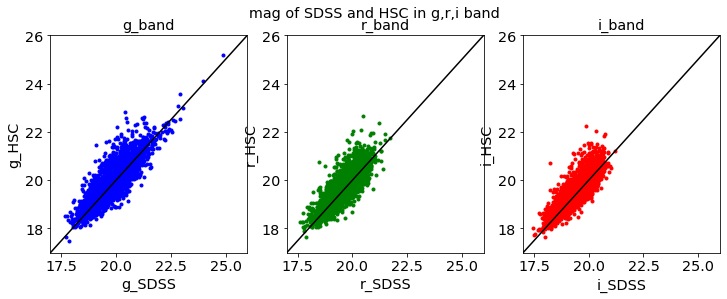

In [13]:
COLORLIST_BGR=['blue','green','red']
name=['g','r','i']

plt.figure(figsize=(12,4))
plt.suptitle('mag of SDSS and HSC in g,r,i band')

for i in range(3):
    band=name[i]
    
    plt.subplot(1,3,i+1)
    plt.title('%s_band'%band)
    x=df['%s_SDSS'%band]
    y=df['%s_HSC'%band]
    #
    
    plt.xlim(17,26)
    plt.ylim(17,26)
    #
    plt.xlabel('%s_SDSS'%band)
    plt.ylabel('%s_HSC'%band)
    #
    plt.scatter(x,y,marker='.',color=COLORLIST_BGR[i]);
    #画一条直线
    xline=np.linspace(17,26)
    yline=xline
    plt.plot(xline,yline,color='black');
    

plt.savefig('./FIGURES/0_2_3.pdf')

这里面能看出来点向HSC方向偏移，说明HSC比SDSS星等大，说明HSC比SDSS暗